<h1>
Sina Hatami 5447389<br>
Shayan Alvansazyazdi 5447411
</h1>

# Lab 1: Deep Neural Network (DNN)

## 1.1 Refresh: build a Single Layer Perceptron
Let's build a single layer perceptron composed by one dense layer.<br>
<img src="https://drive.google.com/uc?id=1cvJa9WfOier2NQIJGHpqDNGn-RlczU1x" width="500px"><br>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers 
import tensorflow as tf 
# Define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 2

# First define the model 
model = Sequential() # model lets us define a linear stack of network layers.

# define our single fully connected network layer
dense_layer = Dense(n_output_nodes, activation='sigmoid',kernel_initializer="Ones",bias_initializer="Ones")

# Add the dense layer to the model
model.add(dense_layer)

2023-04-27 14:06:58.915239: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 14:06:58.957312: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 14:06:58.957721: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 14:06:59.697241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 1.2 refresh: build a Multilayer perceptron
Let's build a multilayer perceptron; MLPs are fully connected, each node in one layer connects with a certain weight to every node in the following layer.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/ANN-Graph.gif" width="400px"><br>

Try to build one composed by two hidden dense layer with ReLU activation and one dense output layer(units=1) with sigmoid activation.

In [2]:
import numpy as np
# Generate dummy data
train_data = np.random.random((1000, 100))
train_labels = np.random.randint(2, size=(1000, 1))
test_data = np.random.random((100, 100))
test_labels = np.random.randint(2, size=(100, 1))

# Build your first model by creating a Sequential object and then adding 3 Dense layers:
units = 32
# Create a Sequential
model = Sequential()
# Add a Dense layer with 32 neurons, with relu as activation function and input dimension equal to the number of features
model.add(Dense(units, input_dim=100, activation='relu',
               kernel_initializer=initializers.RandomNormal(stddev=0.01),
               bias_initializer=initializers.Zeros()))
# Add a Dense layer with 32 neurons, with relu as activation function
model.add(Dense(units, activation='relu'))
# To produce the output Add a Dense layer with 1 neurons, with sigmoid as activation function
model.add(Dense(1, activation='sigmoid'))

In [3]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
# The fit function output is a History object. The history.history attribute is a record of
# training loss values and metrics values at successive epochs, as well as validation loss values 
# and validation metrics values 
history = model.fit(train_data, train_labels, epochs=30, batch_size=32)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.4900
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4870
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5030
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5100
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5170
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5210
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5660
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5620
Epoch 9/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5540
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5700
Epoch 11/30
32/32 [

# 1.3 Build a Deep Neural Network 
In this section we will:
*  1.2.1 Import the dataset
*  1.2.2 Build a model
*  1.2.3 Train the model 
*  1.2.4 Evaluate the model

## 1.3.1 Import the Dataset
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. <br>
Each example is a 28×28 grayscale image, associated with a label from 10 classes.<br>
<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--s6xGmaZX--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png" width="600px"><br>


In [4]:
from sklearn.model_selection import train_test_split
mnist_fashion = tf.keras.datasets.fashion_mnist

(x_learn, y_learn),(x_test, y_test) = mnist_fashion.load_data()
x_learn, x_test = x_learn / 255.0, x_test / 255.0 # normalization 
x_train, x_val, y_train, y_val = train_test_split(x_learn, y_learn, test_size=0.3, random_state=42) # split learn in train,val
num_classes = 10 # Fashion-MNIST classes

print(x_train.shape, x_val.shape, x_test.shape)

(42000, 28, 28) (18000, 28, 28) (10000, 28, 28)


#### Plot some sample from the training set

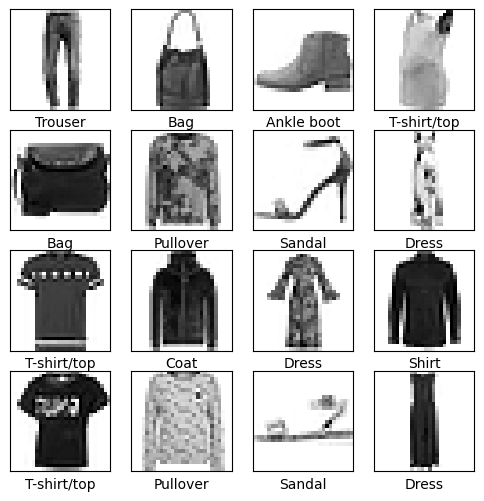

In [5]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 1.3.2 Build a Model

<img src="https://drive.google.com/uc?id=1siIVKXLL7_YsecqlCQqw_ZI35LhR8XbI" width="400px"><br>

A Deep Neural Network is a neural network composed by many layers and consequently it has a deeper structure. The number of layers in the network depends on different factors: for example on the data available, on the complexity of the problem, on the computational power and so on.
The value produced as output by a neuron is determined by the input the neuron receives and by the activation function. There exists different choices for the activation function. One of the most used is Relu but it depends on the data and on the network architecture.
<br><br>
<img src="https://miro.medium.com/max/1400/1*LiBZo_FcnKWqoU7M3GRKbA.png" width="400px"><br>


#### Build a model with this structure: Flatten+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(softmax)

In [6]:
from tensorflow.keras.layers import Flatten
# https://keras.io/layers/core/
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function
model.add(Dense(512, activation='relu'))
# Add a Dense layer with 256 neurons, with relu as activation function
model.add(Dense(256, activation='relu'))
# Add a Dense layer with 128 neurons, with relu as activation function
model.add(Dense(128, activation='relu'))
# Add a Dense layer with 64 neurons, with relu as activation function
model.add(Dense(64, activation='relu'))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(Dense(10, activation='softmax'))


When we are building a model there are many design choises that we must operate: the choice of a Loss Function, the Metrics and the Optimizer.<br>

**Loss functions** are used to compare the network's predicted output  with the real output, in each pass of the backpropagations algorithm<br>
Common loss functions are: mean-squared error, cross-entropy, and so on...<br><br>
**Metrics** are used to evaluate a model; common metrics are precision, recall, accuracy, auc,..<br>

The **Optimizer** determines the update rules of the weights. The performance and update speed may heavily vary from optimizer to optimizer; in choosing an optimizer what's important to consider is the network depth, the type of layers and the type of data.<br>
The gif below give an idea on how different Optimizers work.<br>

<img src="https://user-images.githubusercontent.com/11681225/49325458-fc785480-f585-11e8-8d2a-9012d6024c6e.gif" width="460px">

#### Configures the model for training

In [7]:
# Optimizers    https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras.optimizers.legacy import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(learning_rate=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = Adadelta(learning_rate=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = Adagrad(learning_rate=0.01,epsilon=None,decay=0.0)
adamax = Adamax(learning_rate=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = Nadam(learning_rate=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = RMSprop(learning_rate=0.001,rho=0.9,epsilon=None,decay=0.0)

# Losses    https://keras.io/losses/
loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

# Metrics    https://www.tensorflow.org/api_docs/python/tf/metrics
metrics = ['accuracy','precision','recall']

In [8]:
# Compile the model you created before using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
              loss=loss[0],
              metrics=['accuracy'])

## 1.3.3 Train the model 
The batch size is a number of samples processed before the model is updated.<br>
The number of epochs is the number of complete passes through the training dataset.

In [9]:
batch_size = 128
epochs = 50
# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
print(x_train.shape)
print(y_train.shape)
history = model.fit(x_train, y_train, epochs, batch_size, validation_data=(x_val, y_val))
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

(42000, 28, 28)
(42000,)
Epoch 1/128


2023-04-27 14:07:13.876511: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131712000 exceeds 10% of free system memory.


840/840 [==============================] - 6s 6ms/step - loss: 0.5244 - accuracy: 0.8124 - val_loss: 0.4409 - val_accuracy: 0.8445
Epoch 2/128
840/840 [==============================] - 5s 6ms/step - loss: 0.3793 - accuracy: 0.8614 - val_loss: 0.3806 - val_accuracy: 0.8592
Epoch 3/128
840/840 [==============================] - 5s 6ms/step - loss: 0.3364 - accuracy: 0.8757 - val_loss: 0.3608 - val_accuracy: 0.8678
Epoch 4/128
840/840 [==============================] - 5s 6ms/step - loss: 0.3192 - accuracy: 0.8814 - val_loss: 0.3205 - val_accuracy: 0.8830
Epoch 5/128
840/840 [==============================] - 5s 6ms/step - loss: 0.2961 - accuracy: 0.8894 - val_loss: 0.3487 - val_accuracy: 0.8809
Epoch 6/128
840/840 [==============================] - 6s 7ms/step - loss: 0.2840 - accuracy: 0.8943 - val_loss: 0.3216 - val_accuracy: 0.8827
Epoch 7/128
840/840 [==============================] - 5s 6ms/step - loss: 0.2673 - accuracy: 0.8991 - val_loss: 0.3463 - val_accuracy: 0.8758
Epoch 8/128

2023-04-27 14:17:26.135201: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131712000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.9639 - accuracy: 0.8896
Train: 0.992, Test: 0.890


#### Training history visualization



In [10]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

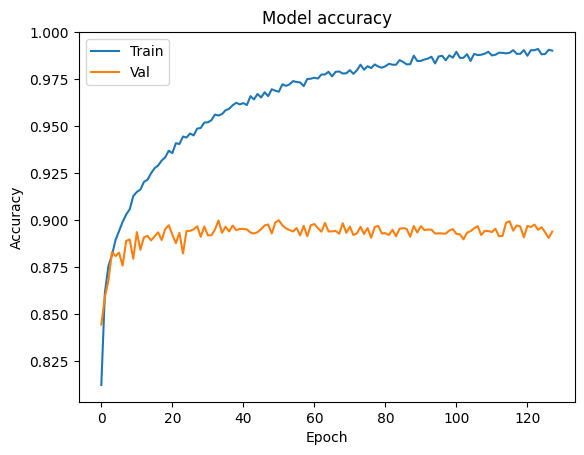

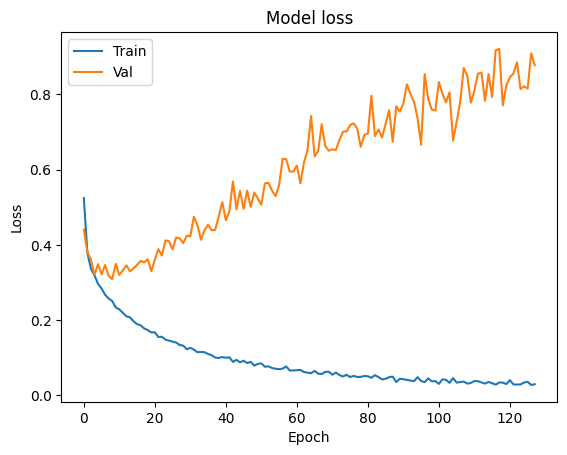

In [11]:
plot_history(history)

**What could you notice in the loss graph training the model over large number of epochs?**

it seems that we are facing overfitting, because we are getting better and better only in training.

## 1.3.4 Evaluate the model


In [12]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

  49/1313 [>.............................] - ETA: 2s - loss: 0.0270 - accuracy: 0.9917

2023-04-27 14:17:36.669310: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131712000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.9639 - accuracy: 0.8896
Train: 0.992, Test: 0.890


**Try to play with these parameters (loss and optimizers) in order to see how this choice affects the accuracy. What do you expect? which is faster?**


# 1.4 Dealing with overfitting
Given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.<br>
A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether).<br>
How to improve generalization of our model on unseen data?<br>
In this section we will:
* 1.3.1 Add weight regularization
* 1.3.2 Dropout
* 1.3.3 Early stopping

## 1.4.1 Add weight regularization
A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".<br>
This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.<br> This cost comes in two flavors:
* L1 regularization
* L2 regularization

In tf.keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

Epoch 1/20


2023-04-27 14:17:51.710534: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131712000 exceeds 10% of free system memory.


4200/4200 [==============================] - 37s 9ms/step - loss: 1.3897 - accuracy: 0.5262 - val_loss: 1.1963 - val_accuracy: 0.5942
Epoch 2/20
4200/4200 [==============================] - 39s 9ms/step - loss: 1.1155 - accuracy: 0.6264 - val_loss: 1.0771 - val_accuracy: 0.6639
Epoch 3/20
4200/4200 [==============================] - 35s 8ms/step - loss: 1.0808 - accuracy: 0.6507 - val_loss: 1.0218 - val_accuracy: 0.6913
Epoch 4/20
4200/4200 [==============================] - 36s 9ms/step - loss: 1.0642 - accuracy: 0.6617 - val_loss: 1.0350 - val_accuracy: 0.6898
Epoch 5/20
4200/4200 [==============================] - 36s 9ms/step - loss: 1.0487 - accuracy: 0.6726 - val_loss: 1.3427 - val_accuracy: 0.5244
Epoch 6/20
4200/4200 [==============================] - 33s 8ms/step - loss: 1.0309 - accuracy: 0.6865 - val_loss: 1.0806 - val_accuracy: 0.6548
Epoch 7/20
4200/4200 [==============================] - 32s 8ms/step - loss: 1.0161 - accuracy: 0.6991 - val_loss: 0.9947 - val_accuracy: 0.7

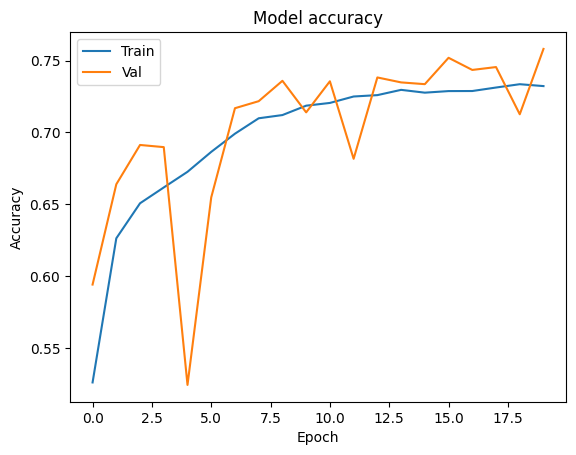

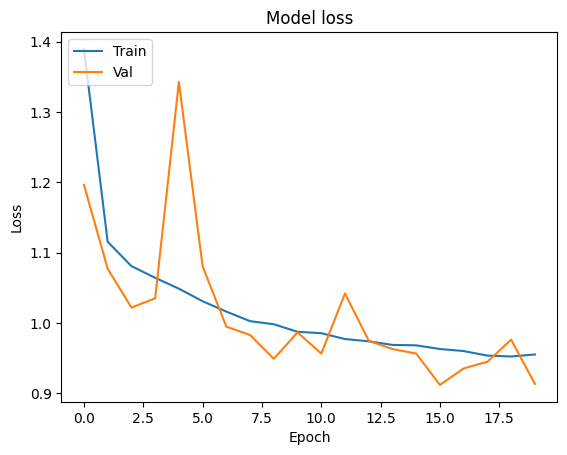

   1/1313 [..............................] - ETA: 3:40 - loss: 0.8752 - accuracy: 0.7500

2023-04-27 14:29:45.299293: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131712000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.9280 - accuracy: 0.7559
Train: 0.765, Test: 0.756


In [13]:
from  tensorflow.keras import regularizers
# Build the model
model = Sequential()
model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L1(0.001)))

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(10, activation='softmax'))
# Add a Dense layer with 512 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
# Add a Dense layer with 256 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
# Add a Dense layer with 128 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
# Add a Dense layer with 64 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function

model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Compile the model you just created using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric


# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
batch_size = 20
epochs = 10
history = model.fit(x_train, y_train, epochs, batch_size, validation_data=(x_val, y_val))

# Call the plot_history function to plot the obtained results
plot_history(history)

# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

## 1.4.2 Dropout
Dropout is one of the most effective and most commonly used regularization techniques for neural networks.<br>
Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.<br>
<img src="https://drive.google.com/uc?id=1PcGnn9cdM5JQk2nxRHAFPZAtBj1fNMvk" width="600px"><br>

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5; at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

Epoch 1/20
4200/4200 [==============================] - 25s 6ms/step - loss: 0.6638 - accuracy: 0.7548 - val_loss: 0.4570 - val_accuracy: 0.8337
Epoch 2/20
4200/4200 [==============================] - 24s 6ms/step - loss: 0.5046 - accuracy: 0.8172 - val_loss: 0.4560 - val_accuracy: 0.8348
Epoch 3/20
4200/4200 [==============================] - 22s 5ms/step - loss: 0.4685 - accuracy: 0.8332 - val_loss: 0.4052 - val_accuracy: 0.8541
Epoch 4/20
4200/4200 [==============================] - 22s 5ms/step - loss: 0.4514 - accuracy: 0.8373 - val_loss: 0.4184 - val_accuracy: 0.8496
Epoch 5/20
4200/4200 [==============================] - 22s 5ms/step - loss: 0.4344 - accuracy: 0.8442 - val_loss: 0.3779 - val_accuracy: 0.8611
Epoch 6/20
4200/4200 [==============================] - 22s 5ms/step - loss: 0.4212 - accuracy: 0.8465 - val_loss: 0.3836 - val_accuracy: 0.8592
Epoch 7/20
4200/4200 [==============================] - 23s 5ms/step - loss: 0.4112 - accuracy: 0.8535 - val_loss: 0.3967 - val_ac

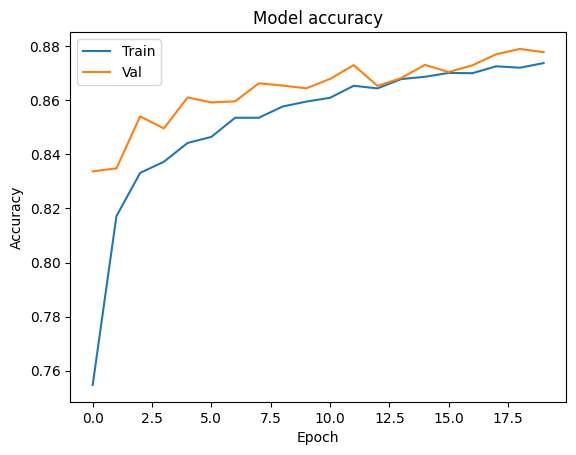

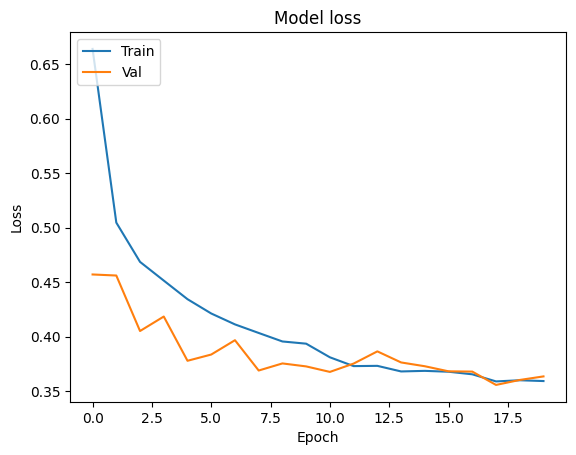

313/313 [==============================] - 1s 2ms/step - loss: 0.3897 - accuracy: 0.8695
Train: 0.896, Test: 0.869


In [14]:
from tensorflow.keras.layers import Dropout
# Build the model
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function
model.add(Dense(512, activation='relu'))
# Add a Dropout layer with 0.3 drop probability
model.add(Dropout(0.2))
# Add a Dense layer with 256 neurons, with relu as activation function
model.add(Dense(512, activation='relu'))
# Add a Dropout layer with 0.3 drop probability
model.add(Dropout(0.3))
# Add a Dense layer with 128 neurons, with relu as activation function
model.add(Dense(128, activation='relu'))
# Add a Dropout layer with 0.3 drop probability
model.add(Dropout(0.3))
# Add a Dense layer with 64 neurons, with relu as activation function
model.add(Dense(64, activation='relu'))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(Dense(10, activation='softmax'))

# Compile the model you just created using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
batch_size = 20
epochs = 10
history = model.fit(x_train, y_train, epochs, batch_size, validation_data=(x_val, y_val))

# Call the plot_history function to plot the obtained results
plot_history(history)

# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

## 1.4.3 Early stopping
Validation can be used to detect when overfitting starts during supervised training of a neural network; training is then stopped before convergence to avoid the overfitting.<br>

<img src="https://drive.google.com/uc?id=1prBt0w2oWIviRDjOSRKP2TglDGUr-EGZ" width="400px"><br><br>



In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
# early stopping https://keras.io/callbacks/
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Create checkpoint callback that will save the best model observed during training for later use
checkpoint_path = "output/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(checkpoint_path,monitor='val_loss',save_weights_only=True,verbose=1)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    cp_callback,
    tf.keras.callbacks.TensorBoard(log_dir=checkpoint_dir)
]

Epoch 1/20
4191/4200 [============================>.] - ETA: 0s - loss: 0.5239 - accuracy: 0.8068
Epoch 1: saving model to output/cp.ckpt
4200/4200 [==============================] - 25s 6ms/step - loss: 0.5238 - accuracy: 0.8068 - val_loss: 0.4355 - val_accuracy: 0.8422
Epoch 2/20
4192/4200 [============================>.] - ETA: 0s - loss: 0.3890 - accuracy: 0.8573
Epoch 2: saving model to output/cp.ckpt
4200/4200 [==============================] - 19s 5ms/step - loss: 0.3888 - accuracy: 0.8574 - val_loss: 0.3695 - val_accuracy: 0.8692
Epoch 3/20
4197/4200 [============================>.] - ETA: 0s - loss: 0.3536 - accuracy: 0.8710
Epoch 3: saving model to output/cp.ckpt
4200/4200 [==============================] - 20s 5ms/step - loss: 0.3535 - accuracy: 0.8710 - val_loss: 0.3471 - val_accuracy: 0.8744
Epoch 4/20
4195/4200 [============================>.] - ETA: 0s - loss: 0.3284 - accuracy: 0.8796
Epoch 4: saving model to output/cp.ckpt
4200/4200 [==============================] - 2

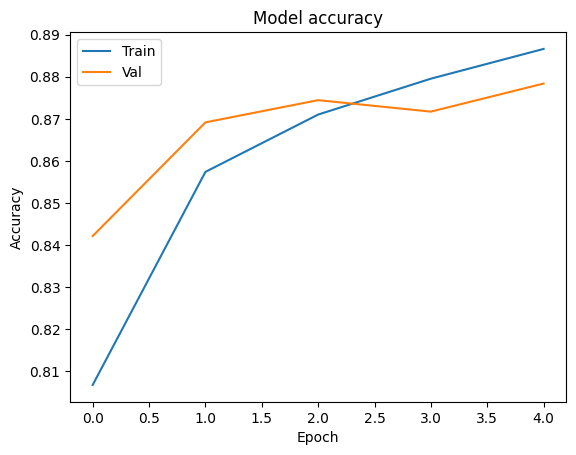

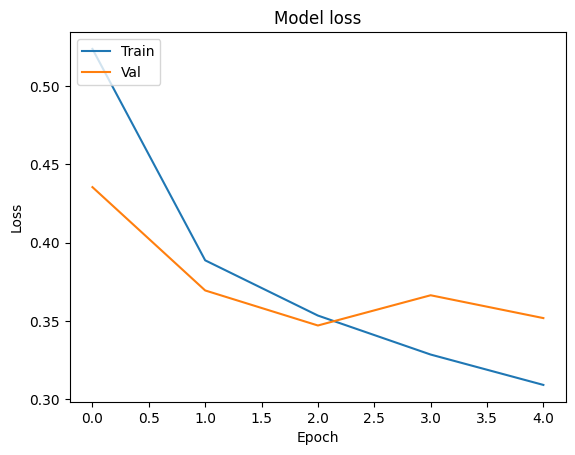

313/313 [==============================] - 1s 2ms/step - loss: 0.3767 - accuracy: 0.8681
Train: 0.894, Test: 0.868


In [16]:
# Build the model
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function
model.add(Dense(512, activation='relu'))
# Add a Dense layer with 256 neurons, with relu as activation function
model.add(Dense(256, activation='relu'))
# Add a Dense layer with 128 neurons, with relu as activation function
model.add(Dense(128, activation='relu'))
# Add a Dense layer with 64 neurons, with relu as activation function
model.add(Dense(68, activation='relu'))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Compile the model you just created using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric


# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
# Be careful to also set properly the callbacks parameter list
batch_size =20
epochs = 10
history = model.fit(x_train, y_train, epochs, batch_size, validation_data=(x_val, y_val), callbacks=my_callbacks)

# Call the plot_history function to plot the obtained results
plot_history(history)

# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

#### Load weights
The saved weights can then be loaded and evaluated any time by calling the load_weights() function.


In [17]:
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.
# link https://www.tensorflow.org/tutorials/keras/save_and_restore_models

checkpoint_path = "output/cp.ckpt"

model.load_weights(checkpoint_path)

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.3767 - accuracy: 0.8681
Train: 0.894, Test: 0.868
